In [13]:
import pandas as pd
import datetime
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

import seaborn as sns
import matplotlib.pyplot as plt

from joblib import load

In [14]:
df = pd.read_csv('D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Zona 11\Kajian Analisis Data LPO dan Digitalisasi\ZONA 11 (ESP)\Data Sumur Field SKW\SKW-02.csv')

In [15]:
from joblib import load

KNN = load(r"D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Garpit Area\Aug 22 2025\Validasi Discharge Pressure\Prediction with Train Data\SKW\DP_XGBoost_8\knn_dp_SKW.joblib")

In [16]:
# from joblib import load

# KNN = load(r"D:\Garpit\Kerja\Kerja Beneran\Zona 11 DB LPO\Garpit Area\Aug 22 2025\Validasi Discharge Pressure\Prediction with Train Data\DP_XGBoost_no forecast\xgboost_dp_v2.joblib")

In [17]:
df.head()

,Location,UWI,Reading Time,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Discharge Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw)
0,SKW-02,SKW-02,2025-03-15 16:49:49,NaN,0.0,NaN,NaN,NaN,NaN,NaN
1,SKW-02,SKW-02,2025-03-15 16:49:53,NaN,0.0,NaN,NaN,NaN,NaN,NaN
2,SKW-02,SKW-02,2025-03-15 16:50:24,0.0,NaN,NaN,NaN,NaN,NaN,NaN
3,SKW-02,SKW-02,2025-03-15 16:50:28,0.0,NaN,NaN,NaN,NaN,NaN,NaN
4,SKW-02,SKW-02,2025-03-15 16:56:44,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [18]:
# # cek apakah semua nilai kolom DP NaN
# if df["Discharge Pressure (psi) (Raw)"].isna().all():
#     print("Semua NaN → lakukan prediksi")
#     pred = df.drop(df.columns[[0,1,2,4,6,7]], axis=1)
#     result = KNN.predict(pred)
#     df["Discharge Pressure (psi) (Raw)"] = result
#     df.to_csv("SKW Final.csv", index=False)
#     print("Prediksi selesai, hasil disimpan di output.csv")
# else:
#     print("Tidak semua NaN → export df")
#     df.to_csv("SKW Final.csv", index=False)

In [19]:
# cek apakah semua nilai kolom DP NaN
if df["Discharge Pressure (psi) (Raw)"].isna().all():
    print("Semua NaN → lakukan prediksi")
    pred = df.drop(df.columns[[0,1,2,4,6]], axis=1)
    result = KNN.predict(pred)
    df["Discharge Pressure (psi) (Raw)"] = result
    df.to_csv("SKW Final.csv", index=False)
    print("Prediksi selesai, hasil disimpan di output.csv")
else:
    print("Tidak semua NaN → export df")
    df.to_csv("SKW Final.csv", index=False)

Tidak semua NaN → export df


# **PLOT**

In [20]:
# pastikan Reading Time jadi datetime
df["Reading Time"] = pd.to_datetime(df["Reading Time"])
df = df.set_index("Reading Time")

# resample per 3 jam dan ambil rata-rata
df_resampled = df.resample("3H").mean(numeric_only=True).reset_index()

In [21]:
df_resampled

,Reading Time,Average Amps (A) (Raw),Drive Frequency (Hz) (Raw),Intake Pressure (psi) (Raw),Discharge Pressure (psi) (Raw),Intake Temperature (F) (Raw),Motor Temperature (F) (Raw),Vibration (gravit) (Raw)
0,2025-03-15 15:00:00,0.000000,0.0,0.000000,0.000000,-4.000000e-09,-4.000000e-09,0.000000
1,2025-03-15 18:00:00,0.000000,0.0,0.000000,0.000000,-4.000000e-09,-4.000000e-09,0.000000
2,2025-03-15 21:00:00,0.000000,0.0,0.000000,0.000000,-4.000000e-09,-4.000000e-09,0.000000
3,2025-03-16 00:00:00,0.000000,0.0,0.000000,0.000000,-4.000000e-09,-4.000000e-09,0.000000
4,2025-03-16 03:00:00,0.000000,0.0,0.000000,0.000000,-4.000000e-09,-4.000000e-09,0.000000
...,...,...,...,...,...,...,...,...
1084,2025-07-29 03:00:00,26.651429,41.0,1763.296154,1967.703704,2.736000e+02,3.044407e+02,0.322222
1085,2025-07-29 06:00:00,26.568085,41.0,1763.166667,1969.083784,2.736000e+02,3.043757e+02,0.332432
1086,2025-07-29 09:00:00,26.816667,41.0,1761.597826,1959.893750,2.736000e+02,3.046146e+02,0.300000
1087,2025-07-29 12:00:00,26.753659,41.0,1761.471429,1961.702632,2.736000e+02,3.045737e+02,0.302632


In [22]:
# kalau mau langsung simpan ke variable "time"
time = df_resampled['Reading Time'].dt.to_pydatetime()

ready = df_resampled

C:\Users\Azhar Nurzaman\AppData\Local\Temp\ipykernel_528\3530080295.py:2: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  time = df_resampled['Reading Time'].dt.to_pydatetime()


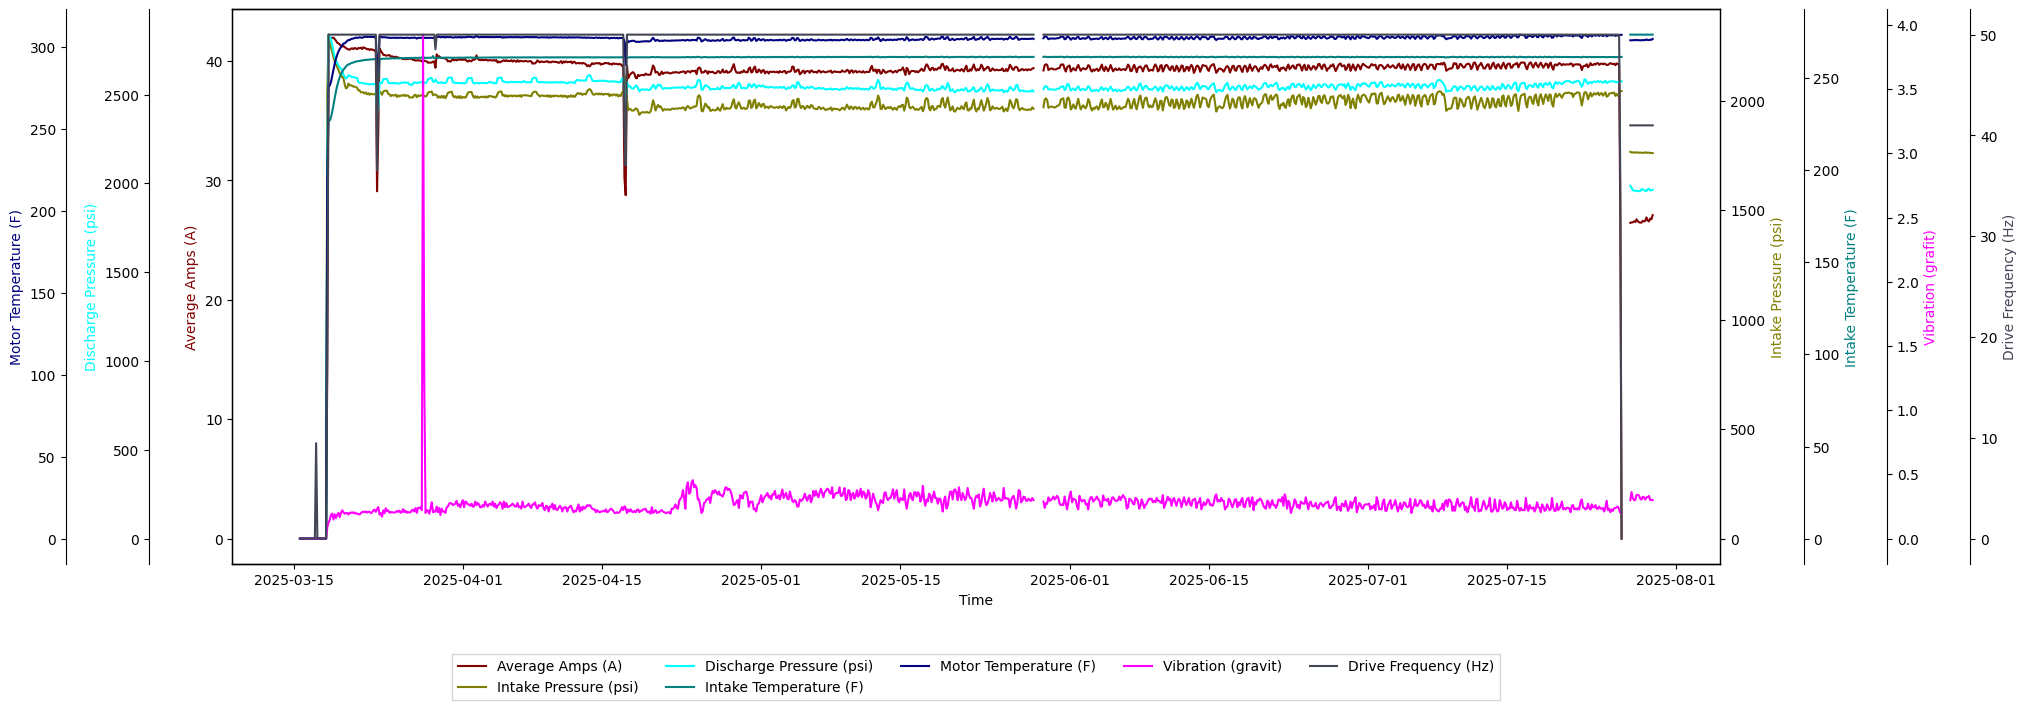

In [23]:
fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()
par3 = host.twinx()
par4 = host.twinx()
par5 = host.twinx()
par6 = host.twinx()

host.set_xlabel("Time")
host.set_ylabel("Average Amps (A)")
par1.set_ylabel("Intake Pressure (psi)")
par2.set_ylabel("Discharge Pressure (psi)")
par3.set_ylabel("Intake Temperature (F)")
par4.set_ylabel("Motor Temperature (F)")
par5.set_ylabel("Vibration (grafit)")
par6.set_ylabel("Drive Frequency (Hz)")

p1, = host.plot(time, ready["Average Amps (A) (Raw)"].to_numpy(), color='#800000', label="Average Amps (A)")
p2, = par1.plot(time, ready["Intake Pressure (psi) (Raw)"].to_numpy(), color='#808000', label="Intake Pressure (psi)")
p3, = par2.plot(time, ready["Discharge Pressure (psi) (Raw)"].to_numpy(), color='#00ffff', label="Discharge Pressure (psi)")
p4, = par3.plot(time, ready["Intake Temperature (F) (Raw)"].to_numpy(), color='#018080', label="Intake Temperature (F)")
p5, = par4.plot(time, ready["Motor Temperature (F) (Raw)"].to_numpy(), color='#000080', label="Motor Temperature (F)")
p6, = par5.plot(time, ready["Vibration (gravit) (Raw)"].to_numpy(), color='#ff00ff', label="Vibration (gravit)")
p7, = par6.plot(time, ready["Drive Frequency (Hz) (Raw)"].to_numpy(), color='#434755', label="Drive Frequency (Hz)")

# Shrink current axis's height by 10% on the bottom
box = host.get_position()
host.set_position([box.x0, box.y0, box.width * 3, box.height * 1.5])

# Put a legend below current axis
lns = [p1, p2, p3, p4, p5, p6, p7]
host.legend(handles=lns, loc='upper center', bbox_to_anchor=(0.5, -0.15),
          fancybox=False, shadow=False, ncol=5)

#Spines
par2.spines['left'].set_position(('outward', 60))
par3.spines['right'].set_position(('outward', 60))
par4.spines['left'].set_position(('outward', 120))
par5.spines['right'].set_position(('outward', 120))
par6.spines['right'].set_position(('outward', 180))

#Ticks
par2.yaxis.set_ticks_position('left')
par3.yaxis.set_ticks_position('right')
par4.yaxis.set_ticks_position('left')
par5.yaxis.set_ticks_position('right')
par6.yaxis.set_ticks_position('right')

#Label
par2.yaxis.set_label_position('left')
par3.yaxis.set_label_position('right')
par4.yaxis.set_label_position('left')
par5.yaxis.set_label_position('right')
par6.yaxis.set_label_position('right')

#Label's color
host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())
par3.yaxis.label.set_color(p4.get_color())
par4.yaxis.label.set_color(p5.get_color())
par5.yaxis.label.set_color(p6.get_color())
par6.yaxis.label.set_color(p7.get_color())

plt.show()

In [24]:
# Ambil hanya nilai unik dari kolom Location (Well Identity)
well_identity = df["Location"].dropna().unique()
# Simpan ke CSV
well_identity_df = pd.DataFrame(well_identity, columns=["Well Identity"])
# Simpan langsung ke folder yang sama dengan kodingan (tanpa path absolut)
file_name = "Well Identity.csv"
well_identity_df.to_csv(file_name, index=False)